## **LENET - 5 Architecture**

In [18]:
# Importing necessary libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, AveragePooling2D, Flatten, Conv2D
from keras.datasets import mnist

In [19]:
# Loading Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [20]:
# Building the LENET-5 Architecture
model = Sequential()

model.add(Input(shape = (28, 28, 1)))
model.add(layer = Conv2D(filters = 6, kernel_size = (5, 5), strides = 1, padding = 'valid', activation = 'tanh'))
model.add(layer = AveragePooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
model.add(layer = Conv2D(filters = 16, kernel_size = (5, 5), strides = 1, padding = 'valid', activation = 'tanh'))
model.add(layer = AveragePooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(units = 120, activation = 'tanh'))
model.add(Dense(units = 84, activation = 'tanh'))
model.add(Dense(units = 10, activation = 'softmax')) # Multiclass Classification

In [21]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
history = model.fit(X_train, y_train, epochs = 15, verbose = 1, validation_split = 0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9119 - loss: 0.3083 - val_accuracy: 0.9764 - val_loss: 0.0786
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9774 - loss: 0.0740 - val_accuracy: 0.9794 - val_loss: 0.0673
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9829 - loss: 0.0535 - val_accuracy: 0.9809 - val_loss: 0.0668
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.9835 - val_loss: 0.0561
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9889 - loss: 0.0372 - val_accuracy: 0.9861 - val_loss: 0.0532
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9899 - loss: 0.0308 - val_accuracy: 0.9833 - val_loss: 0.0556
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9910 - loss: 0.0274 - val_accuracy: 0.9839 - val_loss: 0.0551
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9928 -

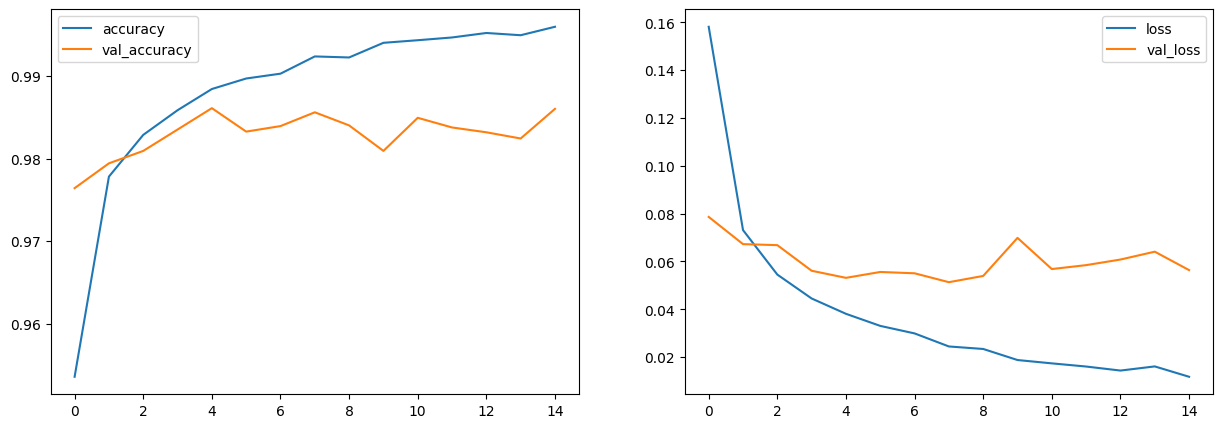

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history.history)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].plot(df['accuracy'], label = 'accuracy')
ax[0].plot(df['val_accuracy'], label = 'val_accuracy')

ax[0].legend()

ax[1].plot(df['loss'], label = 'loss')
ax[1].plot(df['val_loss'], label = 'val_loss')

ax[1].legend()

fig.show()